# Factor portfolio understanding

## Beta factor

### Getting beta

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import keyring
import platform

In [2]:
# database connection info
user = 'root'
pw = keyring.get_password('macmini_db', user)
host = '192.168.219.112' if platform.system() == 'Windows' else '127.0.0.1'
port = 3306
db = 'stock'

## Understanding Beta

### Getting beta

In [3]:
import yfinance as yf 

# select KOSPI and Kiwwon securities tickers
tickers = ['^KS11', '039490.KS']

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker,
                                     start='2016-01-01',
                                     end='2023-12-31')

# select close column
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})

# calculate returns
ret = prices.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
import statsmodels.api as sm 
# regression analysis

# insert 'intercept' column with value 1 for calculating alpha
ret['intercept'] = 1

# we set Kiwoon securities as a dependent variable and KOSPI index as a independent variable.
reg = sm.OLS(ret[['039490.KS']], ret[['^KS11', 'intercept']]).fit()

In [5]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              039490.KS   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.30e-195
Time:                        11:53:48   Log-Likelihood:                 4888.9
No. Observations:                1961   AIC:                            -9774.
Df Residuals:                    1959   BIC:                            -9763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^KS11          1.4320      0.043     33.575      0.000       1.348       1.516
intercept      0.0003      0.000      0.568      0.570      -0.001       0.001
==============================================================================
Omnibus:                      372.424   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9860.402
Skew:                          -0.044   Prob(JB):                         0.00
Kurtosis:                      13.985   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
print(reg.params)

^KS11        1.431958
intercept    0.000257
dtype: float64


## Value Factor

### Download factor data using 'DataReader()` function

In [7]:
# check which data is available

import pandas_datareader as web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets[1:20]

['F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly']

In [8]:
df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
                        'famafrench',
                        start='1900-01-01')
df_pbr[0].head()

C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\2315436809.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\2315436809.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\2315436809.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
C:\Users\woojin\AppData\Local\T

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,12.07,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,4.63,1.22,11.38,1.68,1.50,2.12,2.40,2.45,0.63,0.52
1926-08,-9.73,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,0.15,2.19,6.39,2.38,1.58,2.62,4.77,4.17,8.31,3.92
1926-09,-15.16,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,-0.11,-2.32,6.30,0.73,-0.89,0.40,-0.28,0.04,-2.16,0.44
1926-10,-5.63,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,-3.78,-1.67,-5.01,-1.41,-2.31,-2.07,-4.77,-2.84,-5.46,-1.17
1926-11,5.58,3.13,2.95,2.94,4.12,2.56,1.90,3.96,2.48,6.03,1.51,1.10,3.63,1.97,1.81,4.20,3.39,2.77,1.76


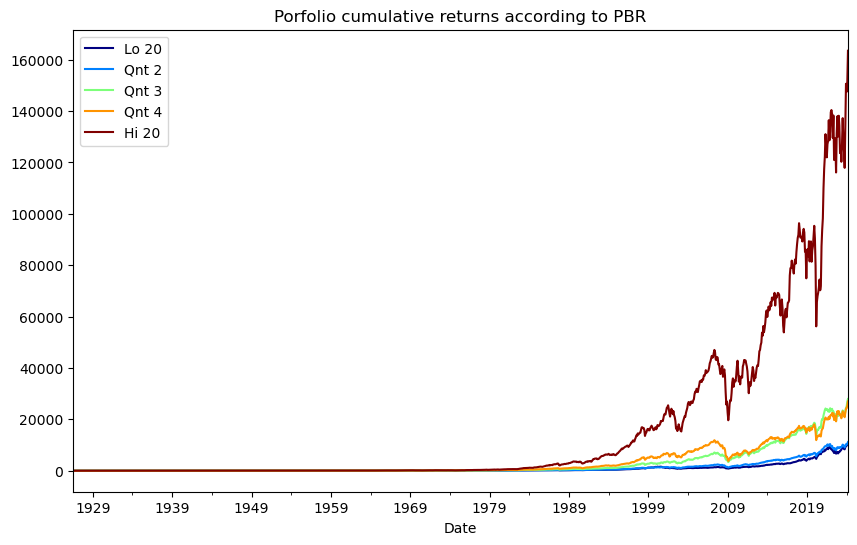

In [9]:
# get accumulated returns with [Lo 20, Qnt 3, Qnt 4, Hi 20] columns which is divided by 20%
import matplotlib.pyplot as plt 
from matplotlib import cm 

plt.rc('axes', unicode_minus=False)

df_pbr_vw = df_pbr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pbr_cum = (1 + df_pbr_vw / 100).cumprod()
df_pbr_cum.plot(figsize=(10, 6),
               colormap=cm.jet,
               legend='reversed',
               title='Porfolio cumulative returns according to PBR')
plt.show()

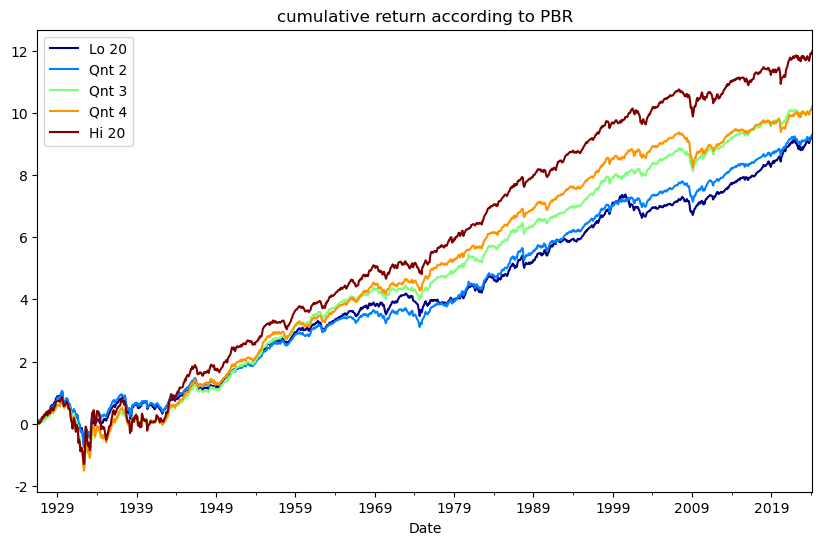

In [10]:
# log return
import numpy as np
df_pbr_cum = np.log(1 + df_pbr_vw / 100).cumsum()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reversed',
                title='cumulative return according to PBR')
plt.show()

In [11]:
# annual return (geometric and arithmetic), volatitiy and sharpe ratio

def factor_stat(df):
    
    n = len(df)
    
    # arithmetic average
    ret_ari = (df / 100).mean(axis=0) * 12
    
    # geometric average
    ret_geo = (1 + df / 100).prod() ** (12 / n ) - 1
    
    # volatility
    vol = (df / 100).std(axis=0) * np.sqrt(12)
    
    # sharpe raio = geometric average / volatility
    sharpe = ret_geo / vol
    
    stat = pd.DataFrame(
        [ret_ari, ret_geo, vol, sharpe],
        index=['annual average return (arithmetic)', 'annual average return (geometric)', 'annual volatility', 'sharpe ratio']
    ).round(4)
    
    # express arithmetic return, geometric return, and volatility multiplied by 100 in the percentage form
    stat.iloc[0:3, ] = stat.iloc[0:3, ] * 100
    return stat

In [12]:
# adjust each PBR portfolio
factor_stat(df_pbr_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
annual average return (arithmetic),11.2900,11.2800,12.370,12.8800,15.9500
annual average return (geometric),9.9300,10.0000,11.040,11.0000,13.0700
annual volatility,18.8300,18.5600,19.470,22.3200,27.7200
sharpe ratio,0.5275,0.5388,0.567,0.4928,0.4714


C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\3507605149.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\3507605149.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\3507605149.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
C:\Users\woojin\AppData\Local\Temp\ip

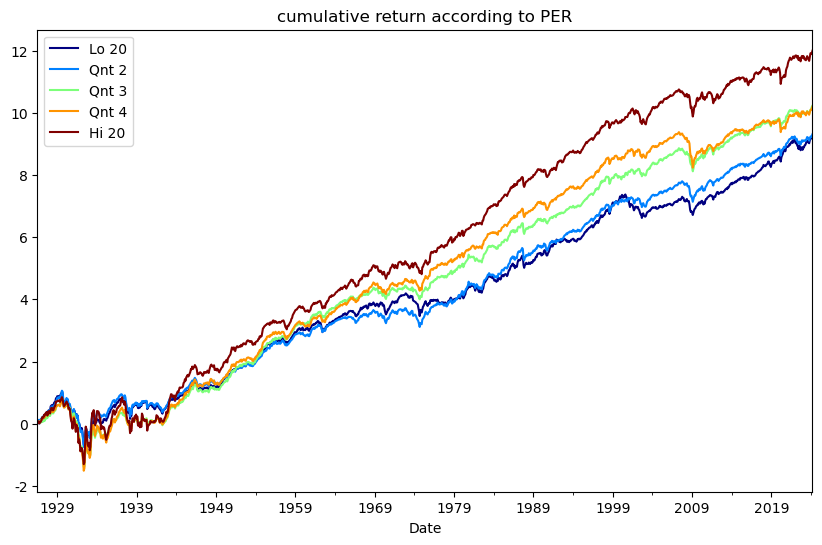

In [13]:
# E/P -> PER reciprocal
df_per = web.DataReader('Portfolios_Formed_on_E-P',
                        'famafrench',
                        start='1900-01-01')
df_per_vw = df_per[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_per_cum = np.log(1 + df_per_vw / 100).cumsum()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reversed',
                title='cumulative return according to PER')
plt.show()

C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\202723359.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\202723359.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\202723359.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
C:\Users\woojin\AppData\Local\Temp\ip

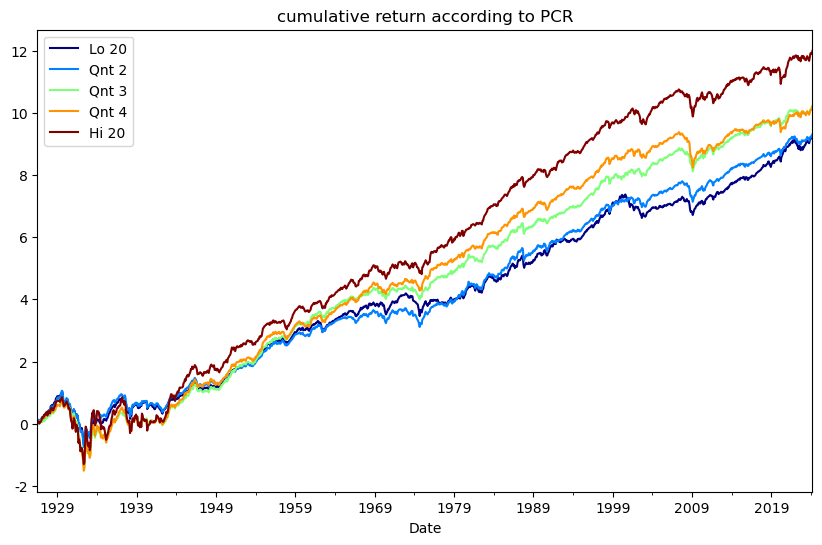

In [14]:
# CF / P -> CPR reciprocal
df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
                        'famafrench',
                        start='1900-01-01')
df_pcr_vw = df_pcr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pcr_cum = np.log(1 + df_pcr_vw / 100).cumsum()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reversed',
                title='cumulative return according to PCR')
plt.show()

### Get Value Portfolio

In [15]:
engine = create_engine(f'mysql+pymysql://{user}:{pw}@{host}:{port}/{db}')

ticker_list = pd.read_sql(
    """ 
    SELECT * FROM ticker_kr
    WHERE date = (SELECT MAX(date) FROM ticker_kr)
    AND category='보통주';
    """
, con=engine)

value_list = pd.read_sql(
    """ 
    SELECT * FROM value_kr
    WHERE date = (SELECT MAX(date) FROM value_kr)
    """
, con=engine)
engine.dispose()

In [16]:
# if the value index is less than 0 (ex: negative profit), we set it to np.nan
value_list.loc[value_list['value'] <=0, 'value'] = np.nan
# transform the table into horizontally with pivot() function
value_pivot = value_list.pivot(index='company_code', columns='ratio', values='value')
# merge ticker table and value table with merge() function
data_bind = ticker_list[['company_code', 'company']].merge(value_pivot, how='left', on='company_code')
data_bind.head()

,company_code,company,DY,PBR,PCR,PER,PSR
0,000020,동화약품,0.0188,0.683526,7.288142,9.135137,0.738091
1,000040,KR모터스,NaN,1.469331,NaN,NaN,0.509742
2,000050,경방,0.0143,0.319985,5.816569,NaN,0.627786
3,000070,삼양홀딩스,0.0472,0.244519,2.314162,2.821798,0.197357
4,000080,하이트진로,0.0482,1.221684,NaN,79.822543,0.550588


In [17]:
# let's find the lowest PER and PBR stocks

# using rank() method, we get the rank of PER and PBR column and rank colum-wise with axis=0.
value_rank = data_bind[['PER', 'PBR']].rank(axis=0)

# sum value with row-wise with sum() method axis=1 parameter
# skip stocks with NA value with skipna=False
# re-rank with summation value with rank() method
value_sum = value_rank.sum(axis=1, skipna=False).rank()

# lowest 20 stocks (value_sum <= 20)
data_bind.loc[value_sum <= 20, ['company_code', 'company', 'PER', 'PBR']]

,company_code,company,PER,PBR
40,000880,한화,2.172238,0.071709
43,000950,전방,0.737075,0.188912
65,001390,KG케미칼,0.692322,0.127756
153,003300,한일홀딩스,2.294874,0.187446
156,003380,하림지주,1.606367,0.155161
247,005720,넥센,2.800099,0.103831
262,005990,매일홀딩스,2.332994,0.159849
268,006120,SK디스커버리,2.094585,0.141632
289,006840,AK홀딩스,2.561308,0.159704
315,007700,F&F홀딩스,1.256456,0.200060


### Combine various indexes

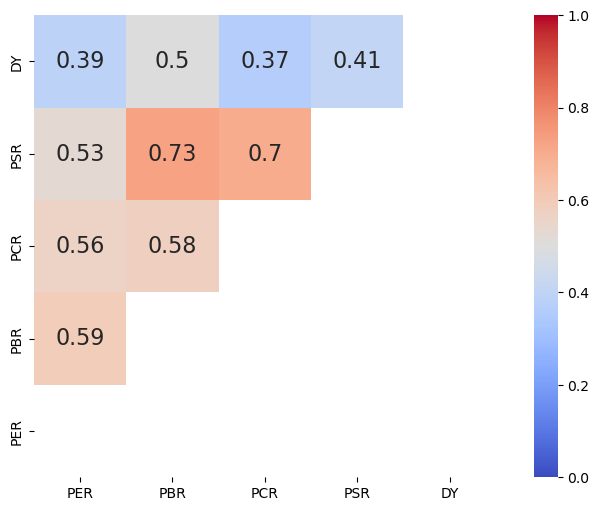

In [19]:
# PER, PBR, PCR, PSR, DY correlation

import seaborn as sns

value_list_copy = data_bind.copy()

# In case of PER, PBR, PCR, PSR, less point it has, the more value it has while DY vice versa
value_list_copy['DY'] = 1 / value_list_copy['DY']
value_list_copy = value_list_copy[['PER', 'PBR', 'PCR', 'PSR', 'DY']]
# get rank with colum-wise
value_rank_all = value_list_copy.rank(axis=0)
mask = np.triu(value_rank_all.corr()) 

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(value_rank_all.corr(),
            annot=True,
            mask=mask,
            annot_kws={'size': 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

In [20]:
# after summing up five indexes, and rerank them
value_sum_all = value_rank_all.sum(axis=1, skipna=False).rank()
# get lowest 20 stocks.
data_bind.loc[value_sum_all <= 20]

,company_code,company,DY,PBR,PCR,PER,PSR
17,000320,노루홀딩스,0.0414,0.239568,1.838558,2.937660,0.133641
38,000850,화천기공,0.0769,0.206887,2.090643,1.975138,0.305686
40,000880,한화,0.0252,0.071709,0.720663,2.172238,0.036195
52,001120,LX인터내셔널,0.1130,0.328882,1.181628,2.897185,0.069011
153,003300,한일홀딩스,0.0629,0.187446,2.364039,2.294874,0.170319
219,004960,한신공영,0.0428,0.111538,1.148875,3.037850,0.060962
226,005090,SGC에너지,0.0736,0.386570,1.790511,3.906761,0.104846
262,005990,매일홀딩스,0.0187,0.159849,0.688928,2.332994,0.051618
268,006120,SK디스커버리,0.0379,0.141632,1.865968,2.094585,0.091901
355,009410,태영건설,0.0968,0.111924,4.544744,0.908036,0.028355


## Momentum Factor

### Portfolio returns from each momentum

C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\1924440964.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_mom = web.DataReader('10_Portfolios_Prior_12_2',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\1924440964.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_mom = web.DataReader('10_Portfolios_Prior_12_2',
C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\1924440964.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_mom = web.DataReader('10_Portfolios_Prior_12_2',
C:\Users\woojin\AppData\Local\Temp\ip

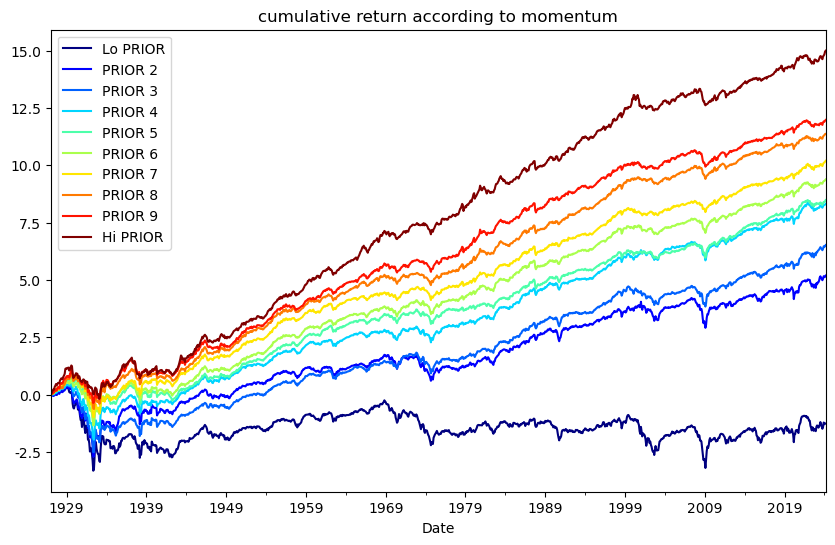

In [21]:
df_mom = web.DataReader('10_Portfolios_Prior_12_2',
                        'famafrench',
                        start='1900-01-01')
df_mom_vw = df_mom[0]
df_mom_cum = np.log(1 + df_mom_vw / 100).cumsum()

plt.rc('axes', unicode_minus=False)

df_mom_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reversed',
                title='cumulative return according to momentum')
plt.show()

In [22]:
# statistical values
factor_stat(df_mom_vw)

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
annual average return (arithmetic),4.2200,9.120,9.5400,10.8800,10.7900,11.6400,12.3200,13.4200,14.2500,18.0500
annual average return (geometric),-1.2800,5.480,6.9400,8.9300,9.1200,10.1300,11.0500,12.4000,13.1000,16.6700
annual volatility,34.1500,28.110,24.1200,21.8600,20.4300,19.9400,18.8900,18.3100,19.3000,22.3300
sharpe ratio,-0.0375,0.195,0.2876,0.4086,0.4462,0.5078,0.5849,0.6773,0.6789,0.7466


### Getting Momentum Portfolio

In [24]:
engine = create_engine(f'mysql+pymysql://{user}:{pw}@{host}:{port}/{db}')

ticker_list = pd.read_sql(
    """ 
    SELECT * FROM ticker_kr
    WHERE date = (SELECT MAX(date) FROM ticker_kr)
    AND category='보통주';
    """
, con=engine)

# get recent 1 year data
price_list = pd.read_sql(
    """ 
    SELECT date, close, company_code
    FROM price_kr
    WHERE date >= (SELECT (SELECT MAX(date) FROM price_kr) - interval 1 year);
    """
, con=engine)
engine.dispose()
price_list.head()

,date,close,company_code
0,2023-03-15,8420.0,000020
1,2023-03-15,457.0,000040
2,2023-03-15,10850.0,000050
3,2023-03-15,74300.0,000070
4,2023-03-15,22250.0,000080


In [25]:
price_pivot = price_list.pivot(index='date', columns='company_code', values='close')
price_pivot.iloc[0:5, 0:5]

company_code,000020,000040,000050,000070,000080
date,,,,,
2023-03-15,8420.0,457.0,10850.0,74300.0,22250.0
2023-03-16,8330.0,450.0,10550.0,74000.0,22200.0
2023-03-17,8430.0,517.0,10630.0,74100.0,22600.0
2023-03-20,8460.0,496.0,10600.0,71900.0,22100.0
2023-03-21,8550.0,495.0,10610.0,72900.0,21750.0


In [27]:
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) -1,
                        columns=['return'])
data_bind = ticker_list[['company_code', 'company']].merge(ret_list, how='left', on='company_code')
data_bind.head()

,company_code,company,return
0,000020,동화약품,0.110451
1,000040,KR모터스,0.017505
2,000050,경방,-0.219355
3,000070,삼양홀딩스,-0.040377
4,000080,하이트진로,-0.087640


In [28]:
# top highest return stock recent 12 months
momentum_rank = data_bind['return'].rank(axis=0, ascending=False)
data_bind[momentum_rank <= 20]

,company_code,company,return
312,007660,이수페타시스,3.119458
565,022100,포스코DX,7.814935
605,025320,시노펙스,2.964427
666,031980,피에스케이홀딩스,4.000000
850,042700,한미반도체,5.760365
1085,065350,신성델타테크,7.400994
1112,066790,씨씨에스,9.921844
1214,078860,아이오케이,10.776650
1235,080220,제주반도체,4.238589
1310,089030,테크윙,4.362832


In [29]:
# plot graph
price_momentum = price_list[price_list['company_code'].isin(
    data_bind.loc[momentum_rank <=20, 'company_code']
)]
price_momentum

,date,close,company_code
313,2023-03-15,8120.0,007660
565,2023-03-15,6160.0,022100
605,2023-03-15,2530.0,025320
666,2023-03-15,8210.0,031980
850,2023-03-15,14230.0,042700
...,...,...,...
585326,2024-03-15,16050.0,253590
585409,2024-03-15,26750.0,281740
585439,2024-03-15,2470.0,290690
585700,2024-03-15,101500.0,399720


c:\Users\woojin\anaconda3\envs\finance\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


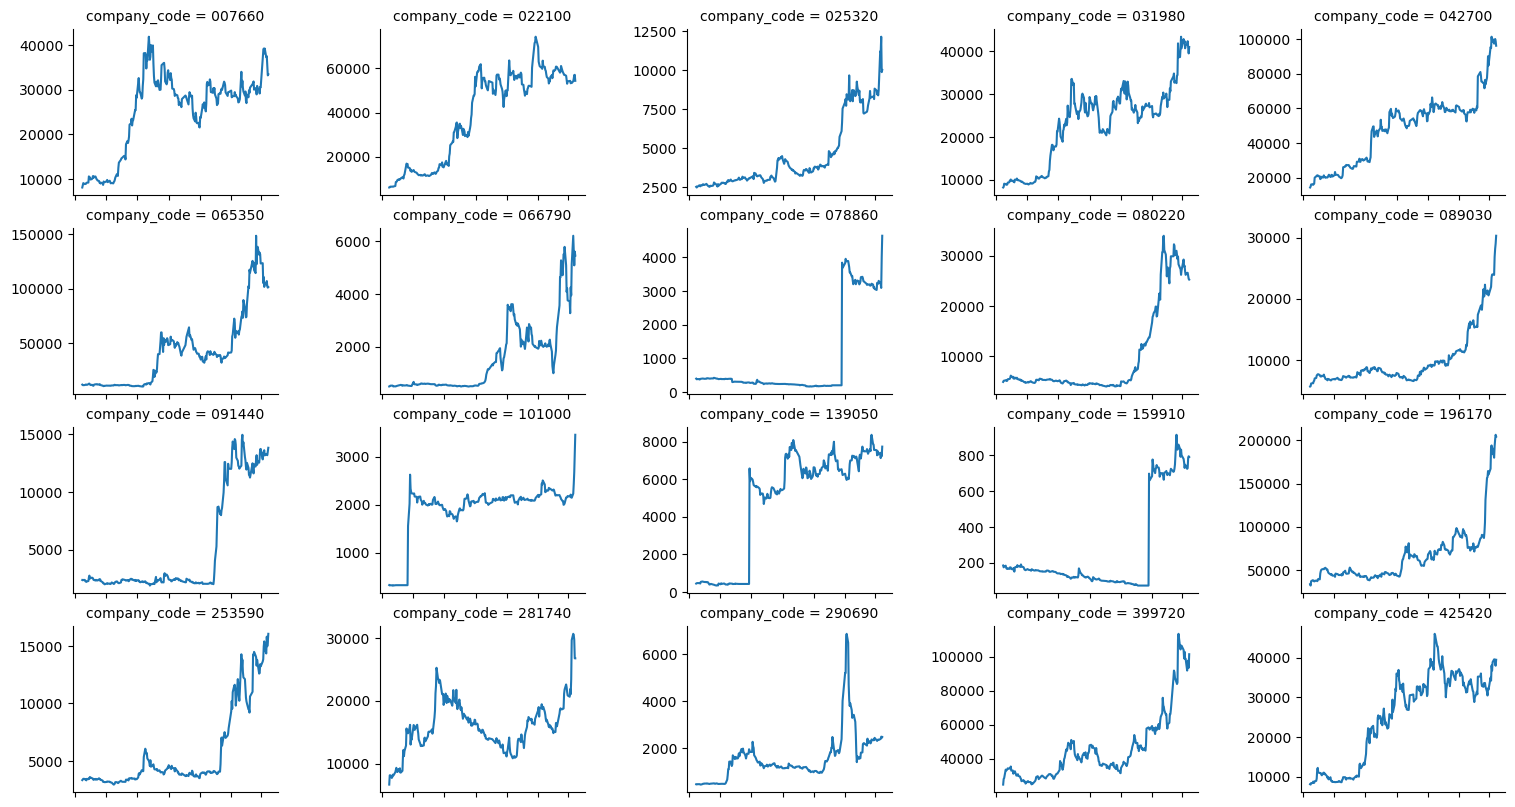

In [31]:
g = sns.relplot(data=price_momentum,
               x='date',
               y='close',
               col='company_code',
               col_wrap=5,
               kind='line',
               facet_kws={
                   'sharey': False,
                   'sharex': True
               })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

### K-ratio

In [32]:
# K-ratio

# calculate return of each stocks and remove first row with no values
ret = price_pivot.pct_change().iloc[1:]
# log cumulative return : add 1 to returns, take logarithm, and sum cumulatively
ret_cum = np.log(1 + ret).cumsum()

# set x-axis as date, y-axis as log cumulative return
x = np.array(range(len(ret)))
y = ret_cum.iloc[:, 0].values

In [34]:
# K-ratio of specific stock
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              804.0
Date:                Sun, 26 May 2024   Prob (F-statistic):                    2.45e-79
Time:                        12:17:09   Log-Likelihood:                          291.75
No. Observations:                 246   AIC:                                     -581.5
Df Residuals:                     245   BIC:                                     -578.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0009   3.33e-05     28.356      0.000       0.001       0.001
==============================================================================
Omnibus:                       14.768   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.817
Skew:                           0.596   Prob(JB):                     0.000368
Kurtosis:                       2.651   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(reg.params, reg.bse, (reg.params / reg.bse))

[0.00094561] [3.33482995e-05] [28.35568771]


In [39]:
# K-Ratio of all stocks
x = np.array(range(len(ret)))
k_ratio = {}

for i in range(0, len(ticker_list)):
    
    ticker = data_bind.loc[i, 'company_code']
    try:
        y = ret_cum.loc[:, price_pivot.columns == ticker]
        reg = sm.OLS(y, x).fit()
        res = float(reg.params / reg.bse)
    except:
        res = np.nan
        
    k_ratio[ticker] = res
        
k_ratio_bind = pd.DataFrame.from_dict(k_ratio, orient='index').reset_index()
k_ratio_bind.columns = ['company_code', 'K_ratio']

k_ratio_bind.head()

C:\Users\woojin\AppData\Local\Temp\ipykernel_19408\854401033.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  res = float(reg.params / reg.bse)


,company_code,K_ratio
0,000020,28.355688
1,000040,2.772770
2,000050,-50.450499
3,000070,-22.256113
4,000080,-10.555229


In [40]:
# rank k-ratio
data_bind = data_bind.merge(k_ratio_bind, how='left', on='company_code')
data_bind

,company_code,company,return,K_ratio
0,000020,동화약품,0.110451,28.355688
1,000040,KR모터스,0.017505,2.772770
2,000050,경방,-0.219355,-50.450499
3,000070,삼양홀딩스,-0.040377,-22.256113
4,000080,하이트진로,-0.087640,-10.555229
...,...,...,...,...
2413,460860,동국제강,NaN,NaN
2414,460930,현대힘스,NaN,NaN
2415,462520,조선내화,NaN,NaN
2416,465770,STX그린로지스,NaN,NaN


In [41]:
k_ratio_rank = data_bind['K_ratio'].rank(axis=0, ascending=False)
data_bind[k_ratio_rank <= 20]

,company_code,company,return,K_ratio
20,000400,롯데손해보험,1.049356,66.511631
31,000660,SK하이닉스,1.037927,77.288062
356,009420,한올바이오파마,1.199145,70.565257
520,017940,E1,0.493107,78.231093
526,018290,브이티,2.000000,65.763378
565,022100,포스코DX,7.814935,66.582021
589,024110,기업은행,0.581950,64.952060
769,036930,주성엔지니어링,2.275696,65.340814
802,039030,이오테크닉스,1.539118,65.979541
850,042700,한미반도체,5.760365,73.669355


c:\Users\woojin\anaconda3\envs\finance\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


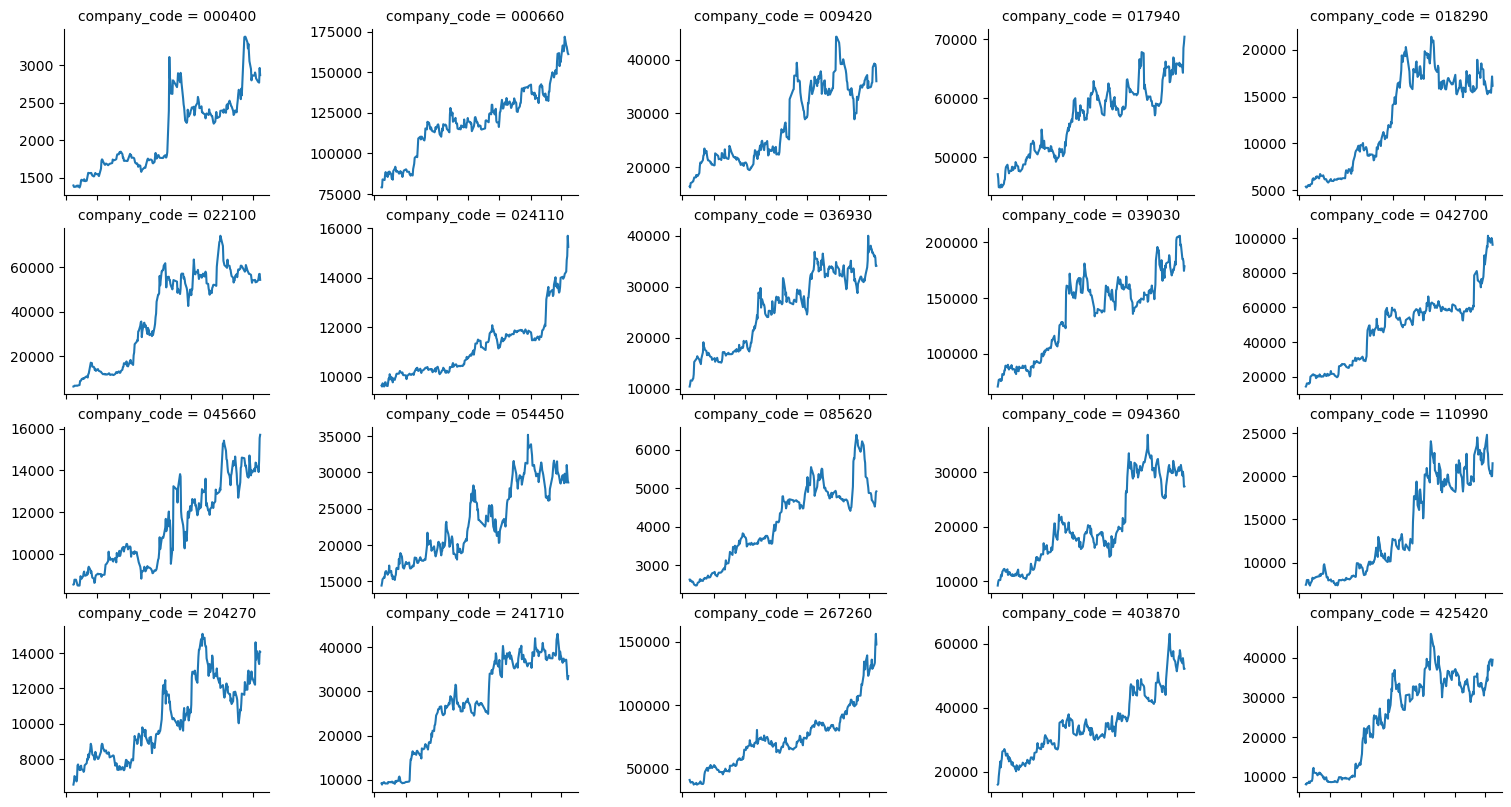

In [43]:
# plot price graph
k_ratio_momentum = price_list[price_list['company_code'].isin(
    data_bind.loc[k_ratio_rank <= 20, 'company_code']
)]
g = sns.relplot(data=k_ratio_momentum,
                x='date',
                y='close',
                col='company_code',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()